Librerias

In [2]:
import os
import scipy.io
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

#CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

In [3]:
#var

#input_shape=(longitud_temporal, canales)
fs = 256
longitud_temporal= int(1.50 * fs)
canales=16

time_length=int(1.50 * fs)
channels=16

#red neuronal - compitlacion del model cnn 1D
optimizer='adam'
loss='mean_squared_error'

In [4]:
ruta = "datos mat\Done"

Funciones

In [5]:
def get_egg_processed_t(ruta_evento):
    # Cargar datos desde el archivo .mat
    mat_data = loadmat(ruta_evento)

    # Obtener 'eeg_processed' del diccionario cargado
    eeg_processed = mat_data.get('eeg_processed')
    eeg_processed_tensor = tf.convert_to_tensor(eeg_processed)

    return eeg_processed_tensor

Todos los datos de 1 suj

In [6]:
def tensor_sujeto(ruta, sujeto):
    tensores_individuales = []

    # Obtener la ruta completa del sujeto
    ruta_sujeto = os.path.join(ruta, f"Subject {sujeto}")

    # Iterar sobre los archivos y directorios dentro de la ruta del sujeto
    for suj_run in os.listdir(ruta_sujeto):
        ruta_run_suj = os.path.join(ruta_sujeto, suj_run)

        # Iterar sobre los marcadores dentro de la ruta de la carrera del sujeto
        for marker in os.listdir(ruta_run_suj):
            ruta_marker = os.path.join(ruta_run_suj, marker)

            # Iterar sobre los eventos dentro de la ruta del marcador
            for event in os.listdir(ruta_marker):
                ruta_evento = os.path.join(ruta_marker, event)

                # Obtener el tensor procesado del evento y agregarlo a la lista
                tensor = get_egg_processed_t(ruta_evento)
                tensores_individuales.append(tensor)

    # Concatenar los tensores individuales en un tensor final a lo largo del eje 0
    tensor_final = tf.concat(tensores_individuales, axis=0)

    return tensor_final


CNN


In [7]:
def create_cnn1d_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para problemas de clasificación binaria

    return model

In [8]:
input_shape = (385,16)
model = create_cnn1d_model(input_shape)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 383, 64)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 189, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 94, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       192,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,953 (788.88 KB)

 Trainable params: 201,953 (788.88 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
e_suj = tf.random.uniform((217747, 1) , minval=0, maxval=2)

In [12]:
labels = e_suj

Por sujeto

In [13]:
def get_egg_processed_t(ruta_evento):
    # Cargar datos desde el archivo .mat
    mat_data = loadmat(ruta_evento)

    # Obtener 'eeg_processed' del diccionario cargado
    eeg_processed = mat_data.get('eeg_processed')
    eeg_processed_tensor = tf.convert_to_tensor(eeg_processed)

    return eeg_processed_tensor

In [14]:
import os
import numpy as np
import tensorflow as tf

def get_event_sujxrun(carpeta_drive, sujeto):
    d= []
    for subject in os.listdir(carpeta_drive):
        if subject.endswith(f"Subject {sujeto}"):
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, 7):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if suj.endswith(f"run_{run}"):
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    d.append(eeg_processed)

    return d


In [15]:
get_event_sujxrun(ruta, "1")

[<tf.Tensor: shape=(385, 16), dtype=float64, numpy=
 array([[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]])>,
 <tf.Tensor: shape=(385, 16), dtype=float64, numpy=
 array([[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155

In [16]:
eventos_sujeto1=get_event_sujxrun(ruta, "1")

In [17]:
def get_event_sujxrun(carpeta_drive, sujeto):
    eventos_por_mark = {}

    for subject in os.listdir(carpeta_drive):
        if f"Subject {sujeto}" in subject:
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, 7):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if f"run_{run}" in suj:  # Corregido para iterar sobre todos los runs
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in eventos_por_mark:
                                        eventos_por_mark[mark] = []
                                    eventos_por_mark[mark].append(eeg_processed)
                                    
   
    return eventos_por_mark 

In [18]:
eventos_sujeto=get_event_sujxrun(ruta, "1")

In [19]:
eventos_sujeto

{'Marker_1': [<tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
          -0.32013615, -0.59905516],
         [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
          -0.09780727, -0.67023779],
         [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
           0.20599897, -0.55113152],
         ...,
         [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
           0.39501937,  0.85777496],
         [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
           0.5060532 ,  0.9429678 ],
         [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
           0.15307825,  0.95560016]])>,
  <tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
          -0.95876275, -0.23228808],
         [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
          -0.61907484,  0.09356379],
         [ 0.64733311, -0.5245075

In [20]:
#clases
# Clase 1 = 0 , Clase 2 = 1, Clase 3 = 2, Clase 4 = 3, Clase 5 = 4, Clase 6 = 5   
clases = [0 , 1, 2, 3, 4, 6]

In [21]:
def get_event_sujxallrun(carpeta_drive, sujeto, n_run):
    datos_por_sujeto = []
    for subject in os.listdir(carpeta_drive):
        if subject.endswith(f"Subject {sujeto}"):
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, n_run+1):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if suj.endswith(f"run_{run}"):
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                  datos_por_sujeto.append(eeg_processed)


    tensor_events= tf.convert_to_tensor(np.stack(datos_por_sujeto))

    return tensor_events


In [22]:
suj1 = get_event_sujxallrun(ruta, "1", 6)
suj2 = get_event_sujxallrun(ruta, "2", 6)
suj3 = get_event_sujxallrun(ruta, "3", 6)
suj4 = get_event_sujxallrun(ruta, "4", 6)
suj5 = get_event_sujxallrun(ruta, "5", 6)
suj6 = get_event_sujxallrun(ruta, "6", 6)                                                   

In [23]:
print("Suj 1", suj1.shape)
print("Suj 2", suj2.shape)
print("Suj 3", suj3.shape)
print("Suj 4", suj4.shape)
print("Suj 5", suj5.shape)
print("Suj 6", suj6.shape)

Suj 1 (441, 385, 16)
Suj 2 (274, 385, 16)
Suj 3 (292, 385, 16)
Suj 4 (352, 385, 16)
Suj 5 (445, 385, 16)
Suj 6 (423, 385, 16)


In [24]:
sujetos = ["2", "3", "4", "5", "6"]

In [25]:
def get_suj_data_tensor(carpeta_drive, sujetos):
    datos_por_sujetos = []

    for sujeto in sujetos:
        for subject in os.listdir(carpeta_drive):
            if subject.endswith(f"Subject {sujeto}"):
                ruta_subj = os.path.join(carpeta_drive, subject)
                archivos_suj = os.listdir(ruta_subj)

                for run in range(1, 7):  # Iterar sobre los 6 runs
                    for suj in archivos_suj:
                        if suj.endswith(f"run_{run}"):
                            ruta_suj = os.path.join(ruta_subj, suj)
                            archivos_mark = os.listdir(ruta_suj)

                            for mark in archivos_mark:
                                ruta_mark = os.path.join(ruta_suj, mark)
                                archivos_event = os.listdir(ruta_mark)

                                for event in archivos_event:
                                    ruta_evento = os.path.join(ruta_mark, event)

                                    eeg_processed = get_egg_processed_t(ruta_evento)
                                    if eeg_processed.shape != (0, 16):
                                        datos_por_sujetos.append(eeg_processed)
                                  

    suj_data_tensor = np.stack(datos_por_sujetos)

    return suj_data_tensor

In [26]:
tensor_sujss= tf.convert_to_tensor(get_suj_data_tensor(ruta, sujetos))

In [27]:
tensor_sujss

<tf.Tensor: shape=(1786, 385, 16), dtype=float64, numpy=
array([[[-0.2446358 ,  0.40736406, -0.00536437, ..., -0.54940025,
          0.50540322, -0.38173708],
        [ 0.02773937,  0.36664599, -0.28894106, ..., -0.58763607,
          0.06506547, -0.47083303],
        [-0.03044996,  0.22847375, -0.32575408, ..., -0.53747107,
         -0.11468289, -0.73254249],
        ...,
        [ 0.22887675,  0.47841226,  0.00398709, ...,  0.63715026,
          0.4410662 ,  0.7607488 ],
        [ 0.35473457,  0.61663944,  0.30332521, ...,  0.66935909,
          0.50479012,  0.57482852],
        [ 0.15887866,  0.46854885,  0.17036   , ...,  0.16542669,
          0.17000425, -0.03361049]],

       [[ 1.        ,  0.46342023,  0.41009179, ...,  0.7882685 ,
         -0.86077094,  0.43338675],
        [ 0.36042165, -0.05587972,  0.22057712, ...,  0.47579006,
         -0.81147358,  0.38976285],
        [-0.29176885, -0.71130238, -0.42135623, ..., -0.13171128,
         -0.96444172,  0.23650474],
        ..

In [28]:
length_datos=385
channels=16

Dato sujeto por marker-marcador

In [29]:

def get_event_sujxmarker(carpeta_drive, sujeto, run):
    datos_x_marker = {}
    for subject in os.listdir(carpeta_drive):
        if subject.endswith(f"Subject {sujeto}"):
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for suj in archivos_suj:
                if suj.endswith(f"run_{run}"):
                    ruta_suj = os.path.join(ruta_subj, suj)
                    archivos_mark = os.listdir(ruta_suj)

                    for mark in archivos_mark:
                        ruta_mark = os.path.join(ruta_suj, mark)
                        archivos_event = os.listdir(ruta_mark)

                        for event in archivos_event:
                            ruta_evento = os.path.join(ruta_mark, event)

                            eeg_processed = get_egg_processed_t(ruta_evento)
                            if eeg_processed.shape != (0, 16):
                                if mark not in datos_x_marker:
                                    datos_x_marker[mark] = []
                                datos_x_marker[mark].append(eeg_processed)

    return datos_x_marker


In [30]:
carpeta_drive = ruta
sujeto = "1"
run = "1"

In [31]:
get_event_sujxmarker(carpeta_drive, sujeto, run)

{'Marker_1': [<tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
          -0.32013615, -0.59905516],
         [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
          -0.09780727, -0.67023779],
         [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
           0.20599897, -0.55113152],
         ...,
         [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
           0.39501937,  0.85777496],
         [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
           0.5060532 ,  0.9429678 ],
         [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
           0.15307825,  0.95560016]])>,
  <tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
          -0.95876275, -0.23228808],
         [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
          -0.61907484,  0.09356379],
         [ 0.64733311, -0.5245075

In [32]:
suj1 = get_event_sujxmarker(carpeta_drive, sujeto, run)

Optimizado x clase

In [33]:
def get_marker(dic):
    markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
    lengths = {key: 0 for key in markers}

    for key, value in dic.items():
        if key in markers:
            markers[key].append(value)
            lengths[key] = len(value)

    tensors = {}
    for key, values in markers.items():
        if values:
            tensors[key] = tf.reshape(tf.convert_to_tensor(values), (lengths[key], 385, 16))

    return tuple(tensors.values()), lengths


In [34]:
datosxmarker, length_datos=get_marker(suj1)
type(datosxmarker),type(length_datos)

(tuple, dict)

In [35]:
m1,m2,m3,m4, m5,m6 =datosxmarker

In [36]:
m2

<tf.Tensor: shape=(16, 385, 16), dtype=float64, numpy=
array([[[ 0.10996718, -0.46860781,  0.38054546, ..., -0.82349113,
         -0.85982885, -0.90093929],
        [-0.21428874, -0.64926251, -0.26451307, ..., -0.95899416,
         -0.99929309, -1.        ],
        [-0.45961105, -0.79450163, -0.88909312, ..., -1.        ,
         -1.        , -0.97470994],
        ...,
        [-0.65699887,  0.444851  ,  0.03771358, ...,  0.15519976,
          0.56602045,  0.48114631],
        [-0.78825596,  0.38199074,  0.19516869, ...,  0.11424667,
          0.47707669,  0.40076135],
        [-1.        ,  0.25787066,  1.        , ...,  0.09790446,
          0.24029741,  0.31881469]],

       [[ 0.67919915,  0.85334893,  0.64544647, ...,  0.92452582,
          0.59887071,  0.16244582],
        [ 0.81535555,  0.93623471, -0.14094072, ...,  0.78967342,
          0.68778708,  0.06121811],
        [ 0.94467644,  1.        ,  0.16571004, ...,  0.66190766,
          0.54754285, -0.08728051],
        ...,

In [37]:
length_datos

{'Marker_1': 8,
 'Marker_2': 16,
 'Marker_3': 18,
 'Marker_4': 12,
 'Marker_5': 10,
 'Marker_6': 10}

Tensor etiqueta

In [38]:
def get_labels(length_datos):
    # valores x clase
    valores = {"Marker_1": 0, "Marker_2": 1, "Marker_3": 2, "Marker_4": 3, "Marker_5": 4, "Marker_6": 5}
    
    labels = []
    for k, n_datos in length_datos.items():
        valor = valores.get(k, -1)  # Si la clave no está en valores, devuelve -1
        secuencia = [valor] * n_datos
        labels.extend(secuencia) #se utiliza para agregar elementos de una lista 

    tensor_etiquetas = tf.convert_to_tensor(labels)
    tensor_etiquetas = tf.reshape(tensor_etiquetas, (-1, 1))
    return tensor_etiquetas

In [39]:
get_labels(length_datos)

<tf.Tensor: shape=(74, 1), dtype=int32, numpy=
array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5]])>

Para los 6 run por persona

In [40]:
def get_event_sujxmarker(carpeta_drive, sujeto):
    datos_por_run = {}

    for run in range(1,7):
        datos_x_marker = {}
        for subject in os.listdir(carpeta_drive):
            if subject.endswith(f"Subject {sujeto}"):
                ruta_subj = os.path.join(carpeta_drive, subject)
                archivos_suj = os.listdir(ruta_subj)

                for suj in archivos_suj:
                    if suj.endswith(f"run_{run}"):
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in datos_x_marker:
                                        datos_x_marker[mark] = []
                                    datos_x_marker[mark].append(eeg_processed)
        datos_por_run[f'Run_{run}'] = datos_x_marker

    return datos_por_run


In [41]:
def get_marker(dic):
    markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
    lengths = {key: 0 for key in markers}

    for key, value in dic.items():
        if key in markers:
            markers[key].append(value)
            lengths[key] = len(value)

    #tensors = {}
    #for key, values in markers.items():
     #   if values:
      #      tensors[key] = tf.reshape(tf.convert_to_tensor(values), (lengths[key], 385, 16))

    return markers, lengths

In [42]:
def get_egg(ruta_evento):
    # Cargar datos desde el archivo .mat
    mat_data = loadmat(ruta_evento)

    # Obtener 'eeg_processed' del diccionario cargado
    eeg_processed = mat_data.get('eeg_processed')
    eeg_processed= tf.convert_to_tensor(eeg_processed)
    return eeg_processed

In [43]:
def get_event_sujxmarker(carpeta_drive, sujeto):
    datos_por_run = {}

    for run in range(1,7):
        datos_x_marker = {}
        for subject in os.listdir(carpeta_drive):
            if subject.endswith(f"Subject {sujeto}"):
                ruta_subj = os.path.join(carpeta_drive, subject)
                archivos_suj = os.listdir(ruta_subj)

                for suj in archivos_suj:
                    if suj.endswith(f"run_{run}"):
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in datos_x_marker:
                                        datos_x_marker[mark] = []
                                    datos_x_marker[mark].append(eeg_processed)
        datos_por_run[f'Run_{run}'] = datos_x_marker

    return datos_por_run


In [44]:
sujxallruns = get_event_sujxmarker(carpeta_drive, "3")

In [45]:
sujxallruns

{'Run_1': {'Marker_1': [<tf.Tensor: shape=(385, 16), dtype=float64, numpy=
   array([[-8.23716818e-01,  1.19336416e-01, -7.41289841e-01, ...,
           -7.88657622e-01,  6.74035910e-03, -5.32586857e-01],
          [-9.13540720e-01,  7.25681772e-02, -7.66997781e-01, ...,
           -9.49838716e-01, -5.69587204e-01, -7.61769408e-01],
          [-8.61778617e-01,  1.34788958e-01, -6.35428218e-01, ...,
           -7.34412181e-01, -4.30943221e-01, -5.95555466e-01],
          ...,
          [ 2.33071631e-01, -8.00800872e-01,  6.91381270e-01, ...,
            7.48917467e-02, -2.99655333e-01,  1.58281824e-01],
          [ 1.82487851e-01, -8.74188731e-01,  6.28837502e-01, ...,
           -3.70488105e-04, -3.87066526e-01,  9.60236912e-02],
          [ 1.04993685e-01, -1.00000000e+00,  4.48841732e-01, ...,
            2.50225650e-01,  8.07995345e-02,  5.80061380e-01]])>,
   <tf.Tensor: shape=(385, 16), dtype=float64, numpy=
   array([[ 0.54530665,  0.59143907,  0.67725417, ...,  1.        ,
     

In [46]:
def get_event_sujxrun(carpeta_drive, sujeto):
    eventos_por_mark = {}

    for subject in os.listdir(carpeta_drive):
        if f"Subject {sujeto}" in subject:
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, 7):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if f"run_{run}" in suj:  # Corregido para iterar sobre todos los runs
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in eventos_por_mark:
                                        eventos_por_mark[mark] = []
                                    eventos_por_mark[mark].append(eeg_processed)
                                    
   
    return eventos_por_mark 

In [47]:
get_event_sujxrun(ruta, "3")

{'Marker_1': [<tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[-8.23716818e-01,  1.19336416e-01, -7.41289841e-01, ...,
          -7.88657622e-01,  6.74035910e-03, -5.32586857e-01],
         [-9.13540720e-01,  7.25681772e-02, -7.66997781e-01, ...,
          -9.49838716e-01, -5.69587204e-01, -7.61769408e-01],
         [-8.61778617e-01,  1.34788958e-01, -6.35428218e-01, ...,
          -7.34412181e-01, -4.30943221e-01, -5.95555466e-01],
         ...,
         [ 2.33071631e-01, -8.00800872e-01,  6.91381270e-01, ...,
           7.48917467e-02, -2.99655333e-01,  1.58281824e-01],
         [ 1.82487851e-01, -8.74188731e-01,  6.28837502e-01, ...,
          -3.70488105e-04, -3.87066526e-01,  9.60236912e-02],
         [ 1.04993685e-01, -1.00000000e+00,  4.48841732e-01, ...,
           2.50225650e-01,  8.07995345e-02,  5.80061380e-01]])>,
  <tf.Tensor: shape=(385, 16), dtype=float64, numpy=
  array([[ 0.54530665,  0.59143907,  0.67725417, ...,  1.        ,
           0.62759094,  0.5671

In [48]:
m = get_event_sujxrun(ruta, "3")

markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
length_datos = {mark: 0 for mark in m}

for mark, value in m.items():
    if mark in markers:
        markers[mark].extend(value)  
        length_datos[mark] += len(value)

tensorxsuj = {}

for key, value in markers.items():
    tensorxsuj[key] = tf.reshape(tf.convert_to_tensor(value), (length_datos[key], 385, 16))

print(tensorxsuj)
print(length_datos)


{'Marker_1': <tf.Tensor: shape=(44, 385, 16), dtype=float64, numpy=
array([[[-8.23716818e-01,  1.19336416e-01, -7.41289841e-01, ...,
         -7.88657622e-01,  6.74035910e-03, -5.32586857e-01],
        [-9.13540720e-01,  7.25681772e-02, -7.66997781e-01, ...,
         -9.49838716e-01, -5.69587204e-01, -7.61769408e-01],
        [-8.61778617e-01,  1.34788958e-01, -6.35428218e-01, ...,
         -7.34412181e-01, -4.30943221e-01, -5.95555466e-01],
        ...,
        [ 2.33071631e-01, -8.00800872e-01,  6.91381270e-01, ...,
          7.48917467e-02, -2.99655333e-01,  1.58281824e-01],
        [ 1.82487851e-01, -8.74188731e-01,  6.28837502e-01, ...,
         -3.70488105e-04, -3.87066526e-01,  9.60236912e-02],
        [ 1.04993685e-01, -1.00000000e+00,  4.48841732e-01, ...,
          2.50225650e-01,  8.07995345e-02,  5.80061380e-01]],

       [[ 5.45306654e-01,  5.91439067e-01,  6.77254170e-01, ...,
          1.00000000e+00,  6.27590937e-01,  5.67169614e-01],
        [ 4.87513775e-01,  5.561950

In [49]:
def agrupar_datos(suj):
    m=get_event_sujxrun(ruta, f"{suj}") 
    markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
    length_datos = {mark: 0 for mark in m}

    for mark, value in m.items():
        if mark in markers:
            markers[mark].extend(value)  
            length_datos[mark] += len(value)

    tensorxsuj = {}

    for key, value in markers.items():
        tensorxsuj[key] = tf.reshape(tf.convert_to_tensor(value), (length_datos[key], 385, 16))
    
    return tensorxsuj, length_datos

tensorxsuj, length_datos = agrupar_datos(1)

print(tensorxsuj)
print(length_datos)


{'Marker_1': <tf.Tensor: shape=(63, 385, 16), dtype=float64, numpy=
array([[[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]],

       [[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155,
         -0.25194263,  0.41252575],

In [50]:
tensorxsuj1, length_datos1 = agrupar_datos(1)
tensorxsuj2, length_datos2 = agrupar_datos(2)
tensorxsuj3, length_datos4 = agrupar_datos(3)
tensorxsuj4, length_datos4 = agrupar_datos(4)
tensorxsuj5, length_datos6 = agrupar_datos(5)
tensorxsuj6, length_datos6 = agrupar_datos(6)

In [51]:
length_datos1["Marker_1"],length_datos2["Marker_1"],length_datos4["Marker_1"],length_datos4["Marker_1"],length_datos6["Marker_1"],length_datos6["Marker_1"]

(63, 39, 49, 49, 73, 73)

In [52]:
length_total_marker_1 = length_datos1["Marker_1"] + \
                          length_datos2["Marker_1"] + \
                          length_datos4["Marker_1"] + \
                          length_datos4["Marker_1"] + \
                          length_datos6["Marker_1"] + \
                          length_datos6["Marker_1"]

print("Total para Marker_1:", length_total_marker_1)

Total para Marker_1: 346


In [53]:
get_labels(length_datos)

<tf.Tensor: shape=(441, 1), dtype=int32, numpy=
array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [54]:
suj = {"Suj_1": [], "Suj_2": [], "Suj_3": [], "Suj_4": [], "Suj_5": [], "Suj_6": []}
markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
for n in range(1, 7):
    tensorxsuj, length_datos = agrupar_datos(n)
    suj[f"Suj_{n}"] = tensorxsuj

In [55]:
# Diccionario para almacenar los datos agrupados por marcador
datos_por_mark = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}

for sujeto, datos in suj.items():
    for marker, tensor in datos.items():
        if marker in datos_por_mark:
            datos_por_mark[marker].append(tensor)

for marker, tensores in datos_por_mark.items():
    datos_por_mark[marker] = tf.concat(tensores, axis=0)

print(datos_por_mark["Marker_1"].shape)
print(datos_por_mark["Marker_1"])



(331, 385, 16)
tf.Tensor(
[[[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
   -0.59905516]
  [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
   -0.67023779]
  [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
   -0.55113152]
  ...
  [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
    0.85777496]
  [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
    0.9429678 ]
  [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
    0.95560016]]

 [[ 0.52829984 -0.75924963 -0.12009981 ...  0.13848112 -0.95876275
   -0.23228808]
  [ 0.58500486 -0.65135342 -0.58990202 ...  0.25117881 -0.61907484
    0.09356379]
  [ 0.64733311 -0.52450758 -0.32888821 ...  0.40487155 -0.25194263
    0.41252575]
  ...
  [-0.62898839  0.1398107   0.34746827 ... -0.89976146 -0.26786495
   -0.71149954]
  [-0.693175    0.12708773  0.6826344  ... -0.8600638  -0.2594464
   -0.65002733]
  [-1.         -0.09184797  0.26584414 ... -0.897

In [56]:
for i in range(1, 7):
    for mark in datos_por_mark:
        if f"Marker_{i}" == mark:
            print(f"Clase {i}: ", datos_por_mark[mark] )
            print("-------------------------------------------")


Clase 1:  tf.Tensor(
[[[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
   -0.59905516]
  [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
   -0.67023779]
  [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
   -0.55113152]
  ...
  [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
    0.85777496]
  [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
    0.9429678 ]
  [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
    0.95560016]]

 [[ 0.52829984 -0.75924963 -0.12009981 ...  0.13848112 -0.95876275
   -0.23228808]
  [ 0.58500486 -0.65135342 -0.58990202 ...  0.25117881 -0.61907484
    0.09356379]
  [ 0.64733311 -0.52450758 -0.32888821 ...  0.40487155 -0.25194263
    0.41252575]
  ...
  [-0.62898839  0.1398107   0.34746827 ... -0.89976146 -0.26786495
   -0.71149954]
  [-0.693175    0.12708773  0.6826344  ... -0.8600638  -0.2594464
   -0.65002733]
  [-1.         -0.09184797  0.26584414 ... -0.8970551 

In [57]:
for i in range(1, 7):
    for mark in datos_por_mark:
        if f"Marker_{i}" == mark:
            print(f"Clase {i} | {datos_por_mark[mark].shape}) | ", datos_por_mark[mark][0])
            print("-------------------------------------------")

Clase 1 | (331, 385, 16)) |  tf.Tensor(
[[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
  -0.59905516]
 [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
  -0.67023779]
 [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
  -0.55113152]
 ...
 [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
   0.85777496]
 [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
   0.9429678 ]
 [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
   0.95560016]], shape=(385, 16), dtype=float64)
-------------------------------------------
Clase 2 | (393, 385, 16)) |  tf.Tensor(
[[ 0.10996718 -0.46860781  0.38054546 ... -0.82349113 -0.85982885
  -0.90093929]
 [-0.21428874 -0.64926251 -0.26451307 ... -0.95899416 -0.99929309
  -1.        ]
 [-0.45961105 -0.79450163 -0.88909312 ... -1.         -1.
  -0.97470994]
 ...
 [-0.65699887  0.444851    0.03771358 ...  0.15519976  0.56602045
   0.48114631]
 [-0.78825596  0.38199074  0.19

In [58]:
print("---------------------------------------------------------------------------------------------------")
for i in range(1, 7):
    for mark in datos_por_mark:
        if f"Marker_{i}" == mark:
            clase = f"Clase {i}"
            datos = datos_por_mark[mark][0].numpy() if isinstance(datos_por_mark[mark], tf.Tensor) else datos_por_mark[mark][0]
            print(f"{clase} | Shape: {datos_por_mark[mark].shape} | {datos}")
            print("---------------------------------------------------------------------------------------------------")


---------------------------------------------------------------------------------------------------
Clase 1 | Shape: (331, 385, 16) | [[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
  -0.59905516]
 [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
  -0.67023779]
 [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
  -0.55113152]
 ...
 [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
   0.85777496]
 [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
   0.9429678 ]
 [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
   0.95560016]]
---------------------------------------------------------------------------------------------------
Clase 2 | Shape: (393, 385, 16) | [[ 0.10996718 -0.46860781  0.38054546 ... -0.82349113 -0.85982885
  -0.90093929]
 [-0.21428874 -0.64926251 -0.26451307 ... -0.95899416 -0.99929309
  -1.        ]
 [-0.45961105 -0.79450163 -0.88909312 ... -1.         -1.
  -0.97470994]
 ...
 

In [59]:
for i in range(1, 7):
    for mark in datos_por_mark:
        if f"Marker_{i}" == mark:
            clase = f"Clase {i}"
            datos = datos_por_mark[mark][0].numpy() if isinstance(datos_por_mark[mark], tf.Tensor) else datos_por_mark[mark][0]
            print(f"| {clase} | Shape: {datos_por_mark[mark].shape} | {datos} |")
            print("--------------------------------------------------------------------------------------------")


| Clase 1 | Shape: (331, 385, 16) | [[-0.7265575  -0.65101729 -1.         ... -0.50346511 -0.32013615
  -0.59905516]
 [-0.67816966 -0.5985542  -0.56414983 ... -0.28778956 -0.09780727
  -0.67023779]
 [-0.64119087 -0.58064911 -0.16354134 ...  0.06860901  0.20599897
  -0.55113152]
 ...
 [-0.14065726  0.2359265   0.81640086 ...  0.27196593  0.39501937
   0.85777496]
 [-0.1461181   0.22426275  0.60313194 ...  0.45532535  0.5060532
   0.9429678 ]
 [-0.32565557  0.05800861 -0.18401914 ...  0.34971831  0.15307825
   0.95560016]] |
--------------------------------------------------------------------------------------------
| Clase 2 | Shape: (393, 385, 16) | [[ 0.10996718 -0.46860781  0.38054546 ... -0.82349113 -0.85982885
  -0.90093929]
 [-0.21428874 -0.64926251 -0.26451307 ... -0.95899416 -0.99929309
  -1.        ]
 [-0.45961105 -0.79450163 -0.88909312 ... -1.         -1.
  -0.97470994]
 ...
 [-0.65699887  0.444851    0.03771358 ...  0.15519976  0.56602045
   0.48114631]
 [-0.78825596  0.3819

In [60]:
marker_1 = datos_por_mark["Marker_1"]
marker_2 = datos_por_mark["Marker_2"]
marker_3 = datos_por_mark["Marker_3"]
marker_4 = datos_por_mark["Marker_4"]
marker_5 = datos_por_mark["Marker_5"]
marker_6 = datos_por_mark["Marker_6"]

In [61]:
marker_1

<tf.Tensor: shape=(331, 385, 16), dtype=float64, numpy=
array([[[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]],

       [[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155,
         -0.25194263,  0.41252575],
        ...

Correcion Tensor etiqueta

In [62]:
def get_labels(length_datos, marker):
    # Valores por clase
    valores = {"Marker_1": 0, "Marker_2": 1, "Marker_3": 2, "Marker_4": 3, "Marker_5": 4, "Marker_6": 5}
    
    # Obtener el valor correspondiente al marcador
    n = valores[f"Marker_{marker}"]
    
    tensor = tf.fill((length_datos, 16), n)
    
    return tensor

In [63]:
dato=marker_1.shape[0]

In [64]:
get_labels(dato, 1)

<tf.Tensor: shape=(331, 16), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

RED NEURONAL CNN

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape=(385,16)

In [66]:
# Crear modelo de red neuronal con Conv1D
model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=input_shape), #capa de entrada, en esta capa se establece formato de entrada
    layers.MaxPooling1D(2),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')  # Capa de salida con una neurona para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Usar categorical_crossentropy para clasificación multiclase
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 383, 64)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 189, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 94, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       192,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,953 (788.88 KB)

 Trainable params: 201,953 (788.88 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
dato=marker_1.shape[0]
etiqueta_labels = get_labels(dato, 1)

In [69]:
def plot_marker(data):
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle('Gráficos Generales', fontsize=24)

    colores = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'olive', 'skyblue', 'salmon', 'teal', 'lime']

    for i in range(16):
        ax = axs[i // 4, i % 4]
        ax.plot(data[:, i], color=colores[i], label=f'Channel {i}')
        ax.set_xlabel('Muestras')
        ax.set_ylabel('Valor')
        ax.set_title(f'Channel {i+1}')
        ax.legend()

    plt.tight_layout()
    plt.show()

PRUEBA RED NEURONAL CNN CONV1D

In [70]:
# Import library
import torch

# Describe the input variable
inp = torch.ones(1,16,6)

# Print input
print("Input = ",inp)

m = torch.nn.Conv1d(in_channels = 16, out_channels = 16, kernel_size = 3)

# Print the parameter list
print("net = ",m)
print("Parameters = ",list(m.parameters()))
# Print the weight
print("Weight = ",m.weight)


out = m(inp)

print("Output = ",out.shape)

Input =  tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]])
net =  Conv1d(16, 16, kernel_size=(3,), stride=(1,))
Parameters =  [Parameter containing:
tensor([[[-0.1297,  0.0374,  0.0438],
         [ 0.0831,  0.0315, -0.1394],
         [-0.0063, -0.0876, -0.1404],
         [ 0.0076,  0.1221, -0.0601],
         [ 0.0163, -0.1179,  0.1000],
         [ 0.0558,  0.1296,  0.0382],
         [ 0.0774, -0.0975,  0.0362],
         [ 0.0083,  0.0532, -0.0841],
         [ 0.0557, -0.1019,  0.1418

In [71]:
def get_egg_processed_t(ruta_evento):
    # Cargar datos desde el archivo .mat
    mat_data = loadmat(ruta_evento)

    # Obtener 'eeg_processed' del diccionario cargado
    eeg_processed = mat_data.get('eeg_processed')
    eeg_processed_tensor = tf.convert_to_tensor(eeg_processed)

    return eeg_processed_tensor

In [72]:
def get_event_sujxrun(ruta, sujeto):
    eventos_por_mark = {}

    for subject in os.listdir(carpeta_drive):
        if f"Subject {sujeto}" in subject:
            ruta_subj = os.path.join(carpeta_drive, subject)
            archivos_suj = os.listdir(ruta_subj)

            for run in range(1, 7):  # Iterar sobre los 6 runs
                for suj in archivos_suj:
                    if f"run_{run}" in suj:  # Corregido para iterar sobre todos los runs
                        ruta_suj = os.path.join(ruta_subj, suj)
                        archivos_mark = os.listdir(ruta_suj)

                        for mark in archivos_mark:
                            ruta_mark = os.path.join(ruta_suj, mark)
                            archivos_event = os.listdir(ruta_mark)

                            for event in archivos_event:
                                ruta_evento = os.path.join(ruta_mark, event)

                                eeg_processed = get_egg_processed_t(ruta_evento)
                                if eeg_processed.shape != (0, 16):
                                    if mark not in eventos_por_mark:
                                        eventos_por_mark[mark] = []
                                    eventos_por_mark[mark].append(eeg_processed)
                                    
   
    return eventos_por_mark 

In [73]:
def agrupar_datos(suj):
    m=get_event_sujxrun(ruta, f"{suj}") 
    markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
    length_datos = {mark: 0 for mark in m}

    for mark, value in m.items():
        if mark in markers:
            markers[mark].extend(value)  
            length_datos[mark] += len(value)

    tensorxsuj = {}

    for key, value in markers.items():
        tensorxsuj[key] = tf.reshape(tf.convert_to_tensor(value), (length_datos[key], 385, 16))
    
    return tensorxsuj, length_datos

tensorxsuj, length_datos = agrupar_datos(1)

print(tensorxsuj)
print(length_datos)

{'Marker_1': <tf.Tensor: shape=(63, 385, 16), dtype=float64, numpy=
array([[[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]],

       [[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155,
         -0.25194263,  0.41252575],

In [74]:
suj = {"Suj_1": [], "Suj_2": [], "Suj_3": [], "Suj_4": [], "Suj_5": [], "Suj_6": []}
markers = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}
for n in range(1, 7):
    tensorxsuj, length_datos = agrupar_datos(n)
    suj[f"Suj_{n}"] = tensorxsuj
    
# Diccionario para almacenar los datos agrupados por marcador
datos_por_mark = {"Marker_1": [], "Marker_2": [], "Marker_3": [], "Marker_4": [], "Marker_5": [], "Marker_6": []}

for sujeto, datos in suj.items():
    for marker, tensor in datos.items():
        if marker in datos_por_mark:
            datos_por_mark[marker].append(tensor)

for marker, tensores in datos_por_mark.items():
    datos_por_mark[marker] = tf.concat(tensores, axis=0)

In [75]:
print(datos_por_mark["Marker_1"].shape)
#print(datos_por_mark["Marker_1"])

(331, 385, 16)


In [76]:
d = datos_por_mark["Marker_1"]

In [77]:
def get_labels(length_datos, marker):
    # Valores por clase
    valores = {"Marker_1": 0, "Marker_2": 1, "Marker_3": 2, "Marker_4": 3, "Marker_5": 4, "Marker_6": 5}
    
    # Obtener el valor correspondiente al marcador
    n = valores[f"Marker_{marker}"]
    
    tensor = tf.fill((length_datos, 16), n)
    
    return tensor

In [78]:
datos =datos_por_mark
length_datos = d.shape[0]
labels = get_labels(length_datos, 1)

In [79]:
length_datos = d.shape[0]
labels = get_labels(length_datos, 1)

In [80]:
labels

<tf.Tensor: shape=(331, 16), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

In [81]:
datos =datos_por_mark


In [82]:
import torch
from torch.utils.data import DataLoader, random_split
#datos= datos["Marker_1"]
batch_size = 32

train_set, val_set = torch.utils.data.random_split(datos, [0.8, 0.2])

train_loader = DataLoader(train_set, batch_size=batch_size)

val_loader = DataLoader(val_set, batch_size=batch_size)

# Checking lengths of train_loader and val_loader, and type of train_set
print(len(train_loader), len(val_loader), type(train_set))


1 1 <class 'torch.utils.data.dataset.Subset'>


In [83]:
#data loader por que se escargar los datos en lotes(batches), procesa multiples muestras a la vez

In [84]:
data = datos["Marker_1"]

In [85]:
batch_size=32

In [86]:
data

<tf.Tensor: shape=(331, 385, 16), dtype=float64, numpy=
array([[[-0.7265575 , -0.65101729, -1.        , ..., -0.50346511,
         -0.32013615, -0.59905516],
        [-0.67816966, -0.5985542 , -0.56414983, ..., -0.28778956,
         -0.09780727, -0.67023779],
        [-0.64119087, -0.58064911, -0.16354134, ...,  0.06860901,
          0.20599897, -0.55113152],
        ...,
        [-0.14065726,  0.2359265 ,  0.81640086, ...,  0.27196593,
          0.39501937,  0.85777496],
        [-0.1461181 ,  0.22426275,  0.60313194, ...,  0.45532535,
          0.5060532 ,  0.9429678 ],
        [-0.32565557,  0.05800861, -0.18401914, ...,  0.34971831,
          0.15307825,  0.95560016]],

       [[ 0.52829984, -0.75924963, -0.12009981, ...,  0.13848112,
         -0.95876275, -0.23228808],
        [ 0.58500486, -0.65135342, -0.58990202, ...,  0.25117881,
         -0.61907484,  0.09356379],
        [ 0.64733311, -0.52450758, -0.32888821, ...,  0.40487155,
         -0.25194263,  0.41252575],
        ...

In [87]:
labels

<tf.Tensor: shape=(331, 16), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>

In [88]:
import tensorflow as tf

class MioDataset(tf.keras.utils.Sequence):
    def __init__(self, inputs, labels, batch_size):
        self.inputs = inputs
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return tf.data.experimental.cardinality(self.inputs).numpy()

    def __getitem__(self, idx):
        batch_inputs = self.inputs[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_labels = self.labels[idx * self.batch_size : (idx + 1) * self.batch_size]
        return batch_inputs, batch_labels



In [89]:
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(data))
val_size = len(data) - train_size

train_inputs, val_inputs = data[:train_size], data[train_size:]
train_labels, val_labels = labels[:train_size], labels[train_size:]

# Crear instancias de la clase MioDataset para entrenamiento y validación
batch_size = 32
train_dataset = MioDataset(train_inputs, train_labels, batch_size)
val_dataset = MioDataset(val_inputs, val_labels, batch_size)


In [90]:
datos2 =datos_por_mark["Marker_2"]
length_datos2 = datos2.shape[0]
labels2 = get_labels(length_datos2, 2)

In [91]:
datos2

<tf.Tensor: shape=(393, 385, 16), dtype=float64, numpy=
array([[[ 1.09967184e-01, -4.68607812e-01,  3.80545462e-01, ...,
         -8.23491132e-01, -8.59828849e-01, -9.00939293e-01],
        [-2.14288739e-01, -6.49262507e-01, -2.64513065e-01, ...,
         -9.58994156e-01, -9.99293093e-01, -1.00000000e+00],
        [-4.59611054e-01, -7.94501630e-01, -8.89093120e-01, ...,
         -1.00000000e+00, -1.00000000e+00, -9.74709942e-01],
        ...,
        [-6.56998872e-01,  4.44850997e-01,  3.77135832e-02, ...,
          1.55199755e-01,  5.66020447e-01,  4.81146308e-01],
        [-7.88255964e-01,  3.81990736e-01,  1.95168693e-01, ...,
          1.14246672e-01,  4.77076687e-01,  4.00761350e-01],
        [-1.00000000e+00,  2.57870657e-01,  1.00000000e+00, ...,
          9.79044568e-02,  2.40297407e-01,  3.18814689e-01]],

       [[ 6.79199154e-01,  8.53348925e-01,  6.45446474e-01, ...,
          9.24525818e-01,  5.98870707e-01,  1.62445816e-01],
        [ 8.15355548e-01,  9.36234705e-01, -1.4

In [92]:
datos2 =datos_por_mark["Marker_2"]
length_datos2 = datos2.shape[0]
labels2 = get_labels(length_datos2, 2)
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(datos2))
val_size = len(datos2) - train_size

train_inputs2, val_inputs2 = datos2[:train_size], datos2[train_size:]
train_labels2, val_labels2 = labels2[:train_size], labels2[train_size:]

# Crear instancias de la clase MioDataset para entrenamiento y validación
batch_size = 32
train_dataset2 = MioDataset(train_inputs2, train_labels2, batch_size)
val_dataset2 = MioDataset(val_inputs2, val_labels2, batch_size)

In [93]:
def conv1d_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, 3, activation='relu', input_shape=input_shape), #capa de entrada, en esta capa se establece formato de entrada
        layers.MaxPooling1D(2),
        layers.Conv1D(32, 3, activation='relu'),
        layers.MaxPooling1D(2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(6, activation='softmax') # Capa de salida con una neurona para clasificación binaria
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # Usar categorical_crossentropy para clasificación multiclase
                  metrics=['accuracy'])

    return model


In [94]:
model= conv1d_model(input_shape)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [95]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 383, 64)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 191, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 189, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 94, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       192,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,278 (790.15 KB)

 Trainable params: 202,278 (790.15 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
epochs=331

In [97]:
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=1, validation_data=(val_inputs, val_labels))

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(1, 16), output.shape=(1, 6)

In [ ]:
def plot_training_history(history, save_path=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot training & validation accuracy values
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Val'], loc='upper left')

    # Save the figure
    if save_path:
        plt.savefig(save_path, format='png')
        print(f"Plot saved to: {save_path}")

    # Show the plot
    plt.show()

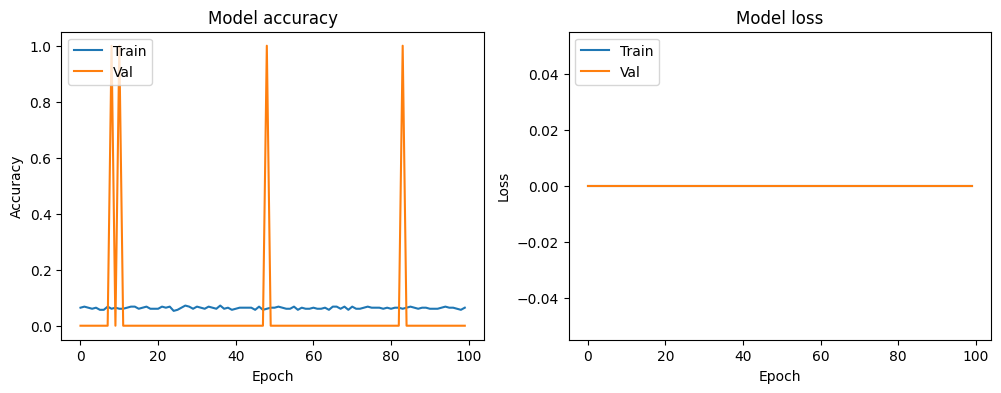

In [ ]:
plot_training_history(history, save_path=None)

In [ ]:
import matplotlib.pyplot as plt

def plot_layer_accuracy(history,save_path=None):
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle('', fontsize=24)
    
    metrics = list(history.history.keys())
    
    # Filtrar las métricas que corresponden a la precisión
    accuracy_metrics = [metric for metric in metrics if 'accuracy' in metric]
    # Determinar el número de capas de salida
    print(len(accuracy_metrics))
    num_output_layers = len(accuracy_metrics)
    
    # Colores para las curvas de precisión
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 
              'brown', 'pink', 'gray', 'olive', 'skyblue', 'salmon', 'teal', 'lime']
    
    # Crear un gráfico para cada métrica de cada capa
    for i, metric in range(1,17):
        row = i // 4
        col = i % 4
        axs[row, col].plot(history.history[metric], color=colors[i], label='Train')
        axs[row, col].plot(history.history[metric], color=colors[i], linestyle='dashed', label='Validation')
        axs[row, col].set_title('Output Layer {}'.format(i+1))
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Accuracy')
        axs[row, col].legend()
    
    plt.tight_layout()
     # Save the figure
    if save_path:
        plt.savefig(save_path, format='png')
        print(f"Plot saved to: {save_path}")

    # Show the plot
    plt.show()
    plt.show()


In [ ]:
plot_layer_accuracy(history)

In [ ]:
history2 = model.fit(train_inputs2, train_labels2, epochs=100, batch_size=1, validation_data=(val_inputs2, val_labels2))

Epoch 1/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0667 - loss: 1362367610880.0000 - val_accuracy: 0.0000e+00 - val_loss: 552280457216.0000
Epoch 2/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0704 - loss: 763971567616.0000 - val_accuracy: 0.0000e+00 - val_loss: 429659815936.0000
Epoch 3/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0722 - loss: 598245376000.0000 - val_accuracy: 0.0000e+00 - val_loss: 600507088896.0000
Epoch 4/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0778 - loss: 580174151680.0000 - val_accuracy: 0.0000e+00 - val_loss: 464858841088.0000
Epoch 5/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0688 - loss: 537408929792.0000 - val_accuracy: 0.0000e+00 - val_loss: 426343464960.0000
Epoch 6/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0555 - loss: 497724456960.0000 - val_accuracy: 0.0000e+00 - val_loss: 583920189440.0000
Epoch 7/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.07

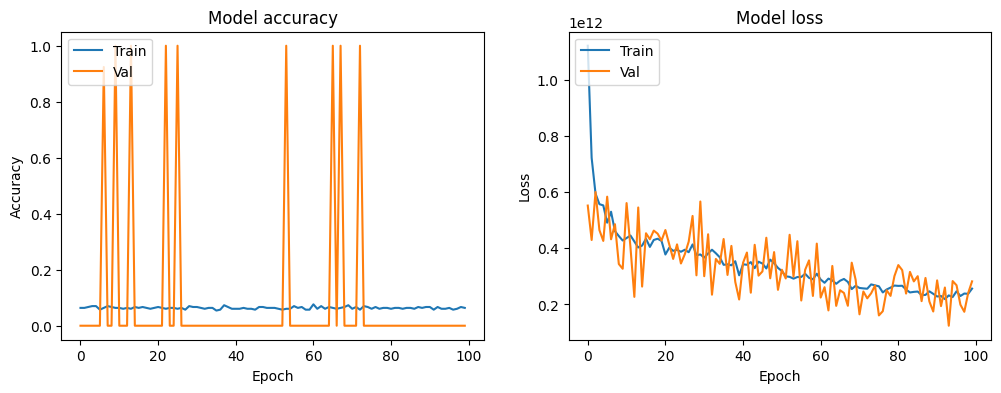

In [ ]:
plot_training_history(history2, save_path=None)

In [ ]:
plot_layer_accuracy(history2)

In [ ]:
datos3 =datos_por_mark["Marker_3"]
length_datos3 = datos3.shape[0]
labels3 = get_labels(length_datos3, 3)
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(datos3))
val_size = len(datos3) - train_size

train_inputs3, val_inputs3 = datos3[:train_size], datos3[train_size:]
train_labels3, val_labels3 = labels3[:train_size], labels3[train_size:]

In [ ]:
datos4 =datos_por_mark["Marker_4"]
length_datos4 = datos4.shape[0]
labels4 = get_labels(length_datos4, 4)
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(datos4))
val_size = len(datos4) - train_size

train_inputs4, val_inputs4 = datos4[:train_size], datos4[train_size:]
train_labels4, val_labels4 = labels4[:train_size], labels4[train_size:]

In [ ]:
history3 = model.fit(train_inputs3, train_labels3, epochs=100, batch_size=1, validation_data=(val_inputs3, val_labels3))

Epoch 1/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0651 - loss: 501658877952.0000 - val_accuracy: 0.0000e+00 - val_loss: 281013321728.0000
Epoch 2/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0587 - loss: 354898903040.0000 - val_accuracy: 0.0000e+00 - val_loss: 348418506752.0000
Epoch 3/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0734 - loss: 368486121472.0000 - val_accuracy: 0.0000e+00 - val_loss: 419915923456.0000
Epoch 4/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0728 - loss: 308829683712.0000 - val_accuracy: 0.0000e+00 - val_loss: 408991727616.0000
Epoch 5/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0692 - loss: 372913602560.0000 - val_accuracy: 0.0000e+00 - val_loss: 275356549120.0000
Epoch 6/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0596 - loss: 306959384576.0000 - val_accuracy: 0.0000e+00 - val_loss: 245026193408.0000
Epoch 7/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.063

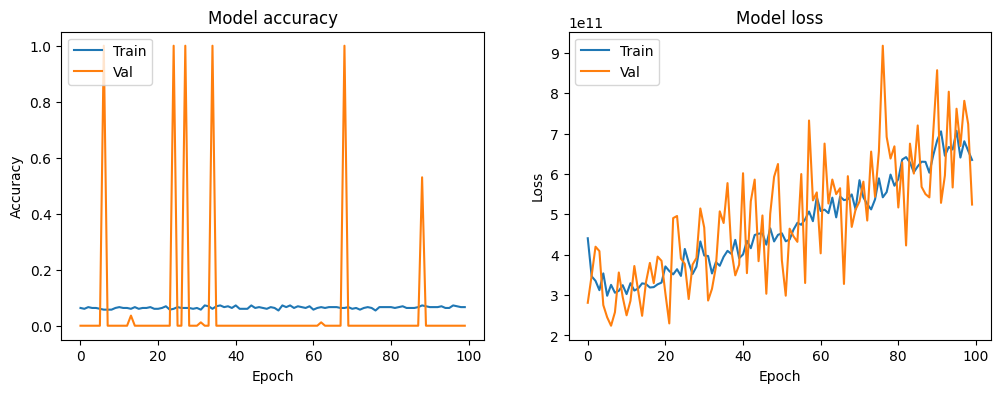

In [ ]:
plot_training_history(history3, save_path=None)

In [ ]:
history4 = model.fit(train_inputs4, train_labels4, epochs=100, batch_size=1, validation_data=(val_inputs4, val_labels4))

Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0701 - loss: 944667361280.0000 - val_accuracy: 0.0000e+00 - val_loss: 809700753408.0000
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0582 - loss: 849497817088.0000 - val_accuracy: 0.0000e+00 - val_loss: 730333315072.0000
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0627 - loss: 810243260416.0000 - val_accuracy: 0.0000e+00 - val_loss: 569709494272.0000
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0534 - loss: 797021241344.0000 - val_accuracy: 0.0000e+00 - val_loss: 657408393216.0000
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0479 - loss: 733294362624.0000 - val_accuracy: 0.0000e+00 - val_loss: 969867264000.0000
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0559 - loss: 752638033920.0000 - val_accuracy: 0.0000e+00 - val_loss: 431425486848.0000
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.100

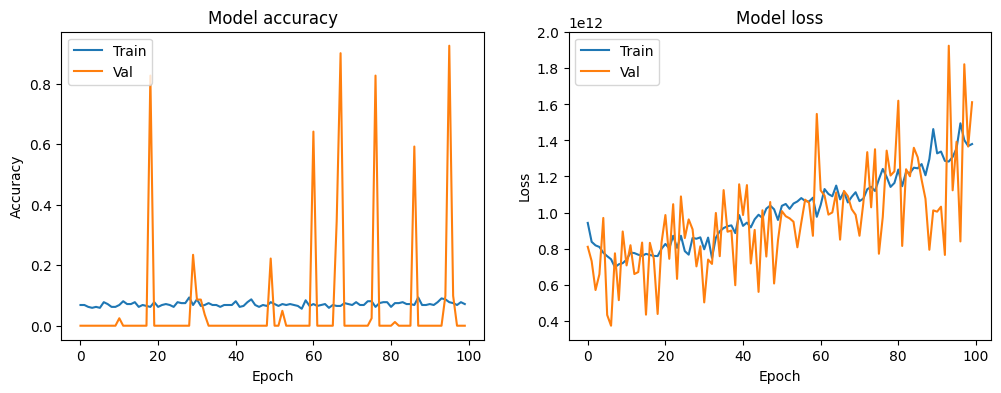

In [ ]:
plot_training_history(history4, save_path=None)

In [ ]:
datos5 =datos_por_mark["Marker_5"]
length_datos5 = datos5.shape[0]
labels5 = get_labels(length_datos5, 5)
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(datos5))
val_size = len(datos5) - train_size

train_inputs5, val_inputs5 = datos5[:train_size], datos5[train_size:]
train_labels5, val_labels5 = labels5[:train_size], labels5[train_size:]

In [ ]:
history5 = model.fit(train_inputs5, train_labels5, epochs=100, batch_size=1, validation_data=(val_inputs5, val_labels5))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0724 - loss: 1800161984512.0000 - val_accuracy: 0.0000e+00 - val_loss: 1600065634304.0000
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0601 - loss: 1597011001344.0000 - val_accuracy: 0.4304 - val_loss: 1052375711744.0000
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0627 - loss: 1673876865024.0000 - val_accuracy: 0.0000e+00 - val_loss: 997302272000.0000
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0886 - loss: 1459739688960.0000 - val_accuracy: 0.0000e+00 - val_loss: 1110004334592.0000
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0776 - loss: 1443309027328.0000 - val_accuracy: 0.0000e+00 - val_loss: 1836506284032.0000
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0830 - loss: 1717362884608.0000 - val_accuracy: 0.0000e+00 - val_loss: 1118974902272.0000
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

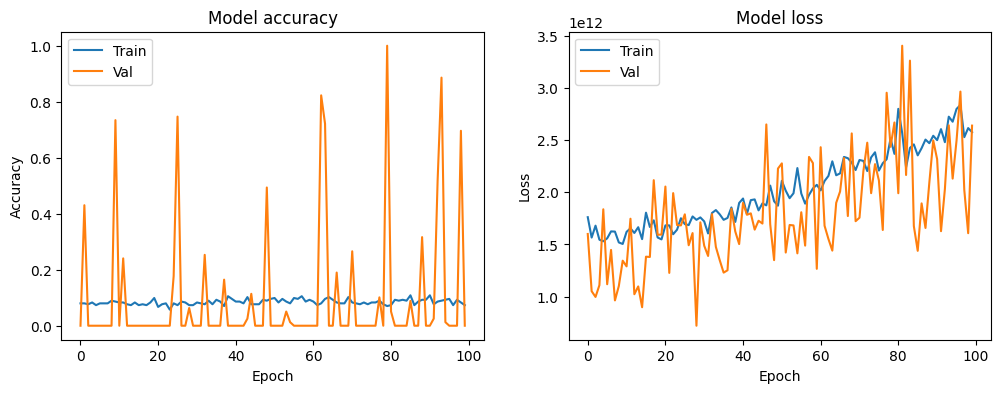

In [ ]:
plot_training_history(history5, save_path=None)

In [ ]:
datos6 =datos_por_mark["Marker_6"]
length_datos6 = datos6.shape[0]
labels6 = get_labels(length_datos6, 6)
# Dividir el conjunto de datos en entrenamiento y validación
train_size = int(0.8 * len(datos6))
val_size = len(datos6) - train_size

train_inputs6, val_inputs6 = datos6[:train_size], datos6[train_size:]
train_labels6, val_labels6 = labels6[:train_size], labels6[train_size:]

In [ ]:
history6 = model.fit(train_inputs6, train_labels6, epochs=100, batch_size=1, validation_data=(val_inputs6, val_labels6))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0800 - loss: 3370747428864.0000 - val_accuracy: 0.0380 - val_loss: 1639970766848.0000
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1141 - loss: 2695452950528.0000 - val_accuracy: 0.0000e+00 - val_loss: 3185615306752.0000
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0861 - loss: 3343064498176.0000 - val_accuracy: 0.9747 - val_loss: 2992885465088.0000
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0979 - loss: 3377725702144.0000 - val_accuracy: 0.0000e+00 - val_loss: 2460091940864.0000
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0712 - loss: 3229083762688.0000 - val_accuracy: 0.0000e+00 - val_loss: 2897200021504.0000
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0825 - loss: 2923691769856.0000 - val_accuracy: 0.0000e+00 - val_loss: 2864036446208.0000
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0

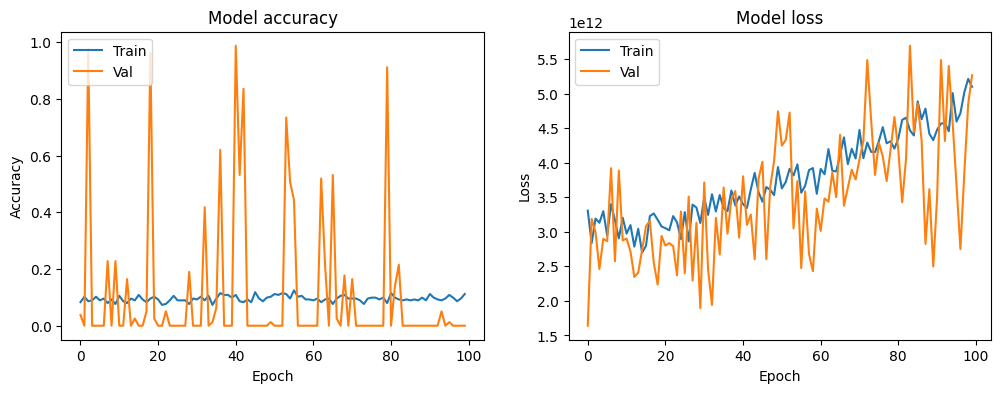

In [ ]:
plot_training_history(history6, save_path=None)

In [ ]:
plot_layer_accuracy(history)
plot_layer_accuracy(history2)
plot_layer_accuracy(history3)
plot_layer_accuracy(history4)
plot_layer_accuracy(history5)
plot_layer_accuracy(history6)

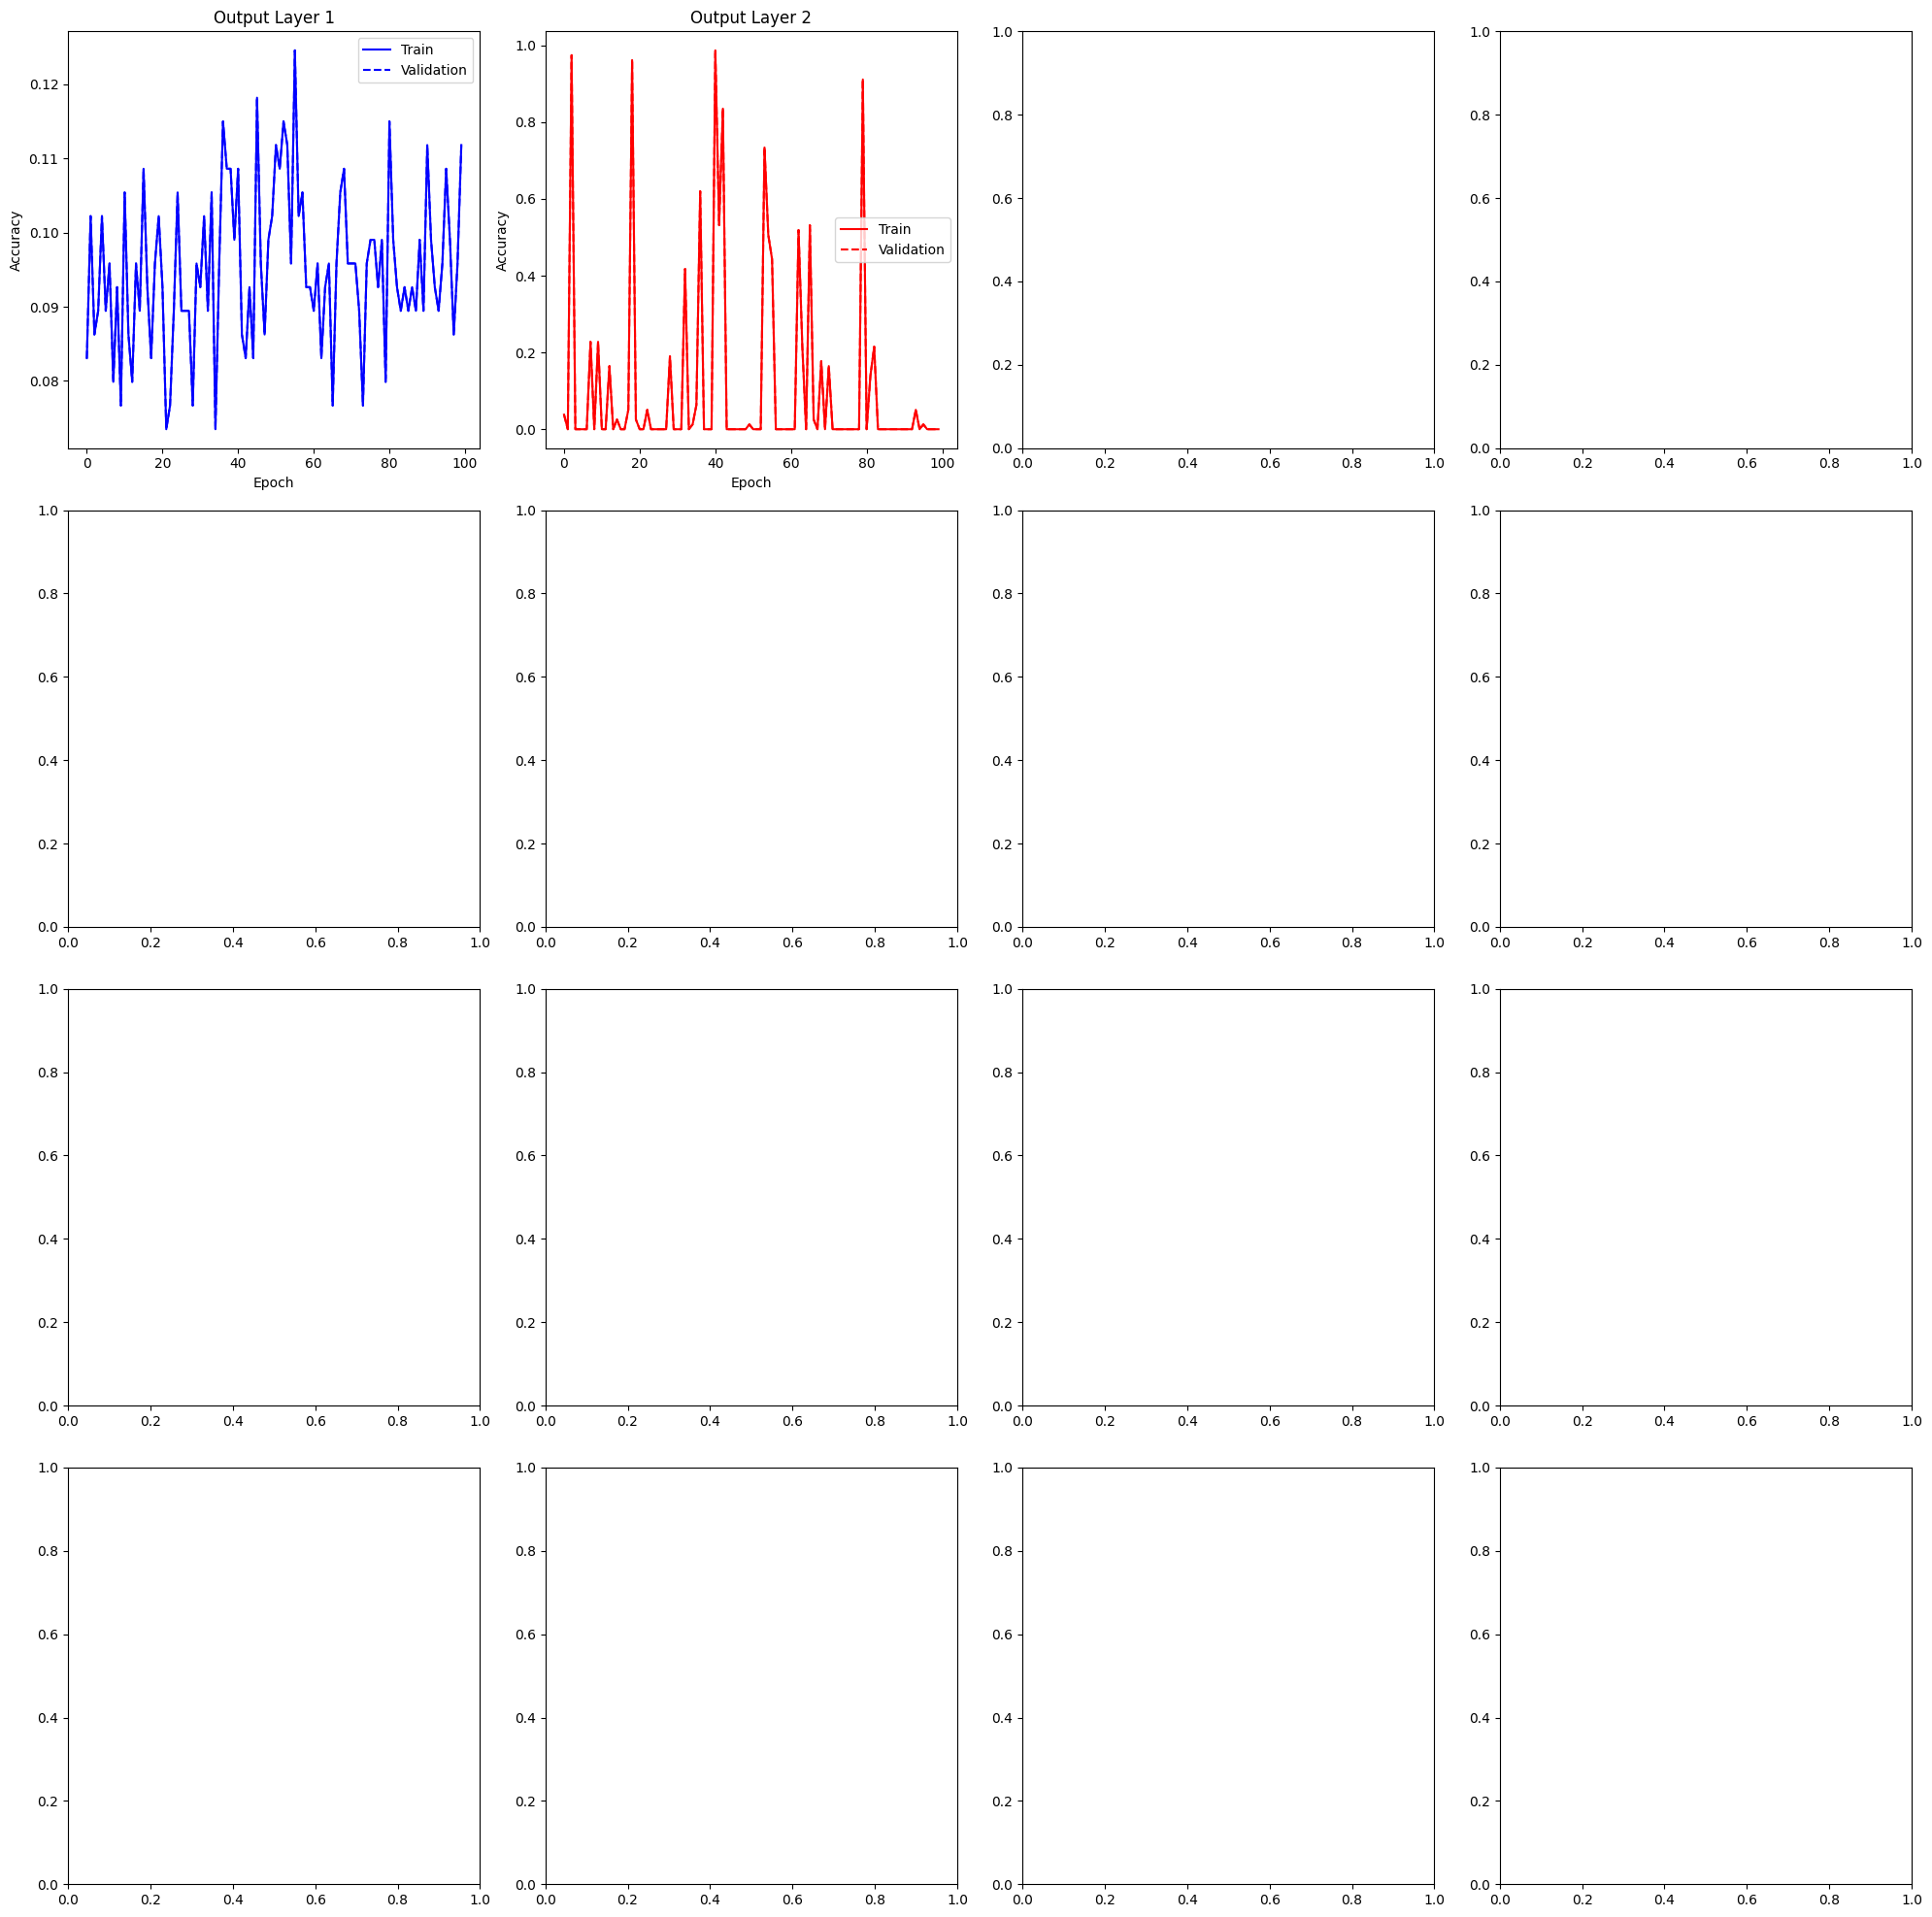

In [ ]:
plot_layer_accuracy(history6)

In [ ]:
import matplotlib.pyplot as plt

def plot_layer_accuracy(history,save_path=None):
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    fig.suptitle('', fontsize=24)
    
    metrics = list(history.history.keys())
    
    # Filtrar las métricas que corresponden a la precisión
    accuracy_metrics = [metric for metric in metrics if 'accuracy' in metric]
    
    # Determinar el número de capas de salida
    num_output_layers = len(accuracy_metrics)
    
    # Colores para las curvas de precisión
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 
              'brown', 'pink', 'gray', 'olive', 'skyblue', 'salmon', 'teal', 'lime']
    
    # Crear un gráfico para cada métrica de cada capa
    for i, metric in range(1,17):
        row = i // 4
        col = i % 4
        axs[row, col].plot(history.history['accuracy'], color=colors[i], label='Train')
        axs[row, col].plot(history.history['accuracy'], color=colors[i], linestyle='dashed', label='Validation')
        axs[row, col].set_title('Output Layer {}'.format(i+1))
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Accuracy')
        axs[row, col].legend()
    
    plt.tight_layout()
     # Save the figure
    if save_path:
        plt.savefig(save_path, format='png')
        print(f"Plot saved to: {save_path}")

    # Show the plot
    plt.show()
    plt.show()


In [ ]:
plot_layer_accuracy(history6)